<a href="https://colab.research.google.com/github/aeleraqi/EDA-Tool/blob/main/EDA_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the file path of the dataset: /content/Housing.csv
Enter the file type (csv or excel): csv
Dataset loaded successfully!
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

F

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Summary Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



Missing Values in the Dataset:


,0


Enter the column names you want to analyze (separated by commas): price
Enter the type of analysis you want to perform (categorical/numerical/correlation): numerical

Numerical Data Analysis:


,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


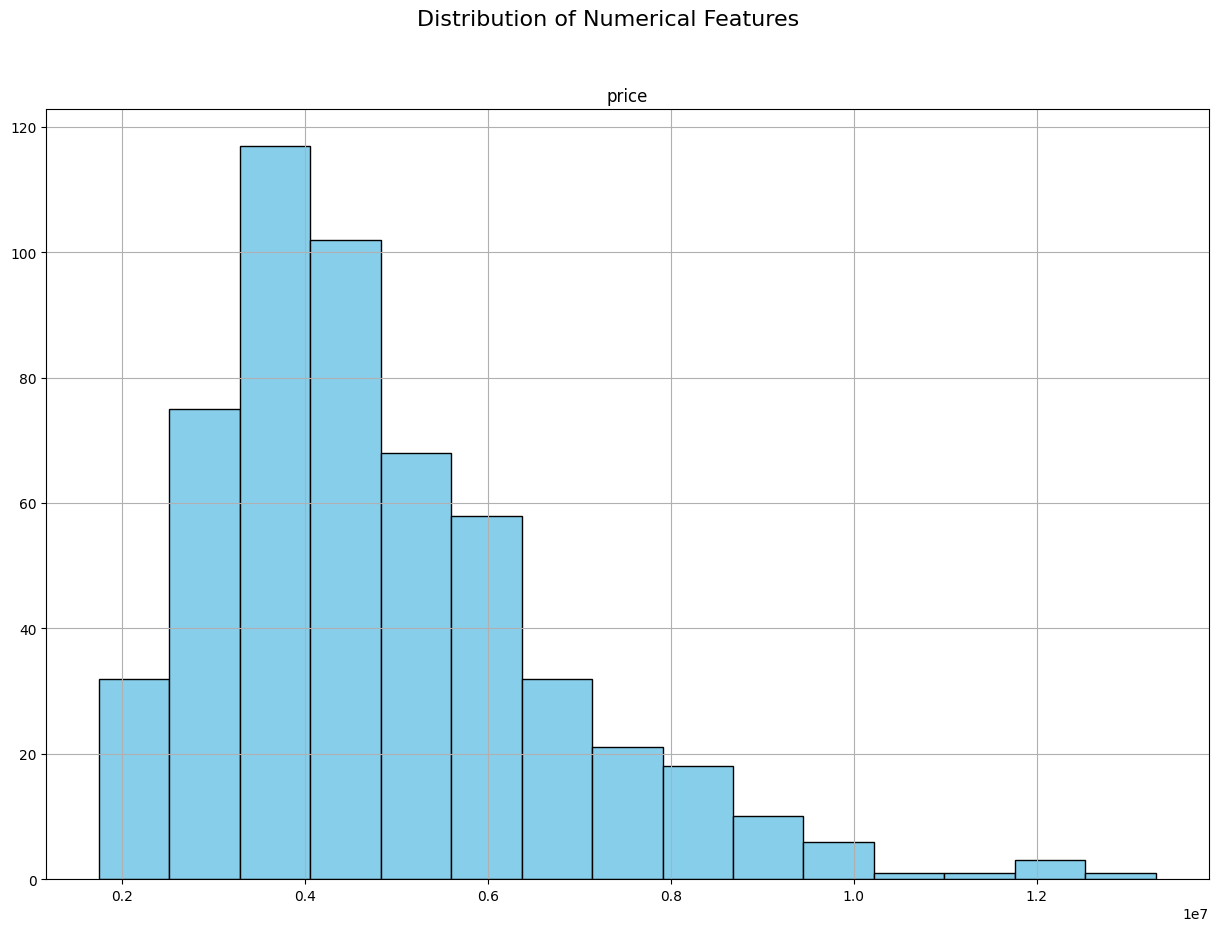

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load the dataset based on user input
def load_dataset():
    """
    Prompt the user to input the file path and file type to load the dataset.

    Returns:
    DataFrame: The loaded dataset.
    """
    file_path = input("Enter the file path of the dataset: ")
    file_type = input("Enter the file type (csv or excel): ").lower()

    try:
        if file_type == 'csv':
            df = pd.read_csv(file_path)
        elif file_type == 'excel':
            df = pd.read_excel(file_path)
        else:
            print("Unsupported file type. Please provide either a CSV or Excel file.")
            return None

        print("Dataset loaded successfully!")
        return df

    except FileNotFoundError:
        print("Error: File not found. Please provide a valid file path.")

# Function for basic dataset overview
def dataset_overview(df):
    """
    Display a basic overview of the dataset.

    Parameters:
    df (DataFrame): The dataset to analyze.
    """
    print("Dataset Information:")
    print(df.info())
    print("\nFirst 5 rows of the dataset:")
    display(df.head())
    print("\nSummary Statistics:")
    display(df.describe())

# Function to handle missing values
def handle_missing_values(df):
    """
    Display missing value information and provide options to handle them.

    Parameters:
    df (DataFrame): The dataset to analyze.
    """
    print("\nMissing Values in the Dataset:")
    missing_data = df.isnull().sum()
    display(missing_data[missing_data > 0])

# Function to analyze specific columns of the dataset based on user input
def analyze_columns(df):
    """
    Prompt the user to select columns for analysis and perform the chosen analysis type.

    Parameters:
    df (DataFrame): The dataset to analyze.
    """
    columns = input("Enter the column names you want to analyze (separated by commas): ").split(',')
    analysis_type = input("Enter the type of analysis you want to perform (categorical/numerical/correlation): ").lower()

    columns = [col.strip() for col in columns]  # Removing extra spaces

    if analysis_type == 'categorical':
        analyze_categorical_data(df[columns])
    elif analysis_type == 'numerical':
        analyze_numerical_data(df[columns])
    elif analysis_type == 'correlation':
        visualize_correlations(df[columns])
    else:
        print("Invalid analysis type. Please choose from categorical, numerical, or correlation.")

# Function to analyze categorical data
def analyze_categorical_data(df):
    """
    Display unique values and their counts for categorical columns.

    Parameters:
    df (DataFrame): The dataset to analyze.
    """
    print("\nCategorical Data Analysis:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())

# Function to analyze numerical data
def analyze_numerical_data(df):
    """
    Display summary statistics and distribution plots for numerical columns.

    Parameters:
    df (DataFrame): The dataset to analyze.
    """
    print("\nNumerical Data Analysis:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    display(df[numerical_cols].describe())

    # Plotting histograms for each numerical column
    df[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
    plt.suptitle('Distribution of Numerical Features', fontsize=16)
    plt.show()

# Function to visualize correlations between numerical features
def visualize_correlations(df):
    """
    Display a heatmap to visualize correlations between numerical features.

    Parameters:
    df (DataFrame): The dataset to analyze.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.show()

# Main function to run the tool
def main():
    df = load_dataset()
    if df is not None:
        dataset_overview(df)
        handle_missing_values(df)
        analyze_columns(df)

# Run the tool
main()
